In [29]:
#import relevant libaries and machine learning frameworks for classification task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
# import relevant libraries for machine learning pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve

In [2]:
#read out the data
df = pd.read_csv('C:/Users/DONKAMS/Downloads/Project_STA2017/NigeriaAutoInsurance_Vehicle_analyzed.csv')
df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_00N7XT1,2010-07-06,2011-07-05,Female,71,2010-07-06,2,JEEP,Black,REXTON,Badagry,Lagos,Car Classic,0
1,ID_01ZY7FF,2010-08-07,2011-08-06,Male,30,2010-08-07,1,Saloon,Grey,TOYOTA,Ikeja,Lagos,Car Classic,1
2,ID_022U6TV,2010-10-28,2011-10-27,Male,40,2010-10-28,2,Saloon,Black,Honda,Municipal Area Council,Federal Capital Territory,Car Classic,0
3,ID_02DJWEN,2010-01-23,2011-01-16,Male,41,2010-01-23,1,Saloon,Silver,TOYOTA,Apapa,Lagos,Car Classic,0
4,ID_03U3I31,2010-09-06,2011-09-05,Male,39,2010-09-06,2,Saloon,Red,TOYOTA,Oshodi-Isolo,Lagos,Car Classic,0


In [3]:
#check the shape of the data
df.shape

(2667, 14)

<h2 align = 'center'> Basic Modeling </h2>

In [4]:
#split the data into train and test set with 80% training and 20% test
train, test = train_test_split(df, test_size=0.2, random_state=42)
#print the shape of the train and test set
print(train.shape)
print(test.shape)

(2133, 14)
(534, 14)


In [5]:
df.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target'],
      dtype='object')

In [8]:
#Define the features and target variable
features = ['Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName']
labels = 'target'
numerical_features = ['Age', 'No_Pol']
categorical_features = ['Gender','Car_Category','Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State','ProductName']

In [10]:
# train test split
X = train[features]
y = train[labels]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

#### LogisticRegression

In [20]:
## define preprocessing for numeric features(scale them)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
## define preprocessing for categorical features(encode them)
categorical_transformer = Pipeline(steps=[
    ('label', OneHotEncoder(handle_unknown='ignore'))])
## amalgamate preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])
## create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

## fit the pipeline to train a logistic regression model on the training set
PIPEmodelLR = pipeline.fit(X_train,y_train)
print (PIPEmodelLR)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'No_Pol']),
                                                 ('cat',
                                                  Pipeline(steps=[('label',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Car_Category',
                                                   'Subject_Car_Colour',
                                                   'Subject_Car_Make',
                                                   'LGA_Name', 'State',
                                                   'ProductName'])])),
                ('classifier', LogisticRegression())])


In [21]:
# Evaluation Metrics
PIPEpredictionsLR = PIPEmodelLR.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,PIPEpredictionsLR ))
print(classification_report(y_test, PIPEpredictionsLR))
# Print the confusion matrix
cm = confusion_matrix(y_test, PIPEpredictionsLR)
print (cm)

Accuracy:  0.7859375
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       506
           1       0.41      0.05      0.09       134

    accuracy                           0.79       640
   macro avg       0.60      0.52      0.49       640
weighted avg       0.72      0.79      0.71       640

[[496  10]
 [127   7]]


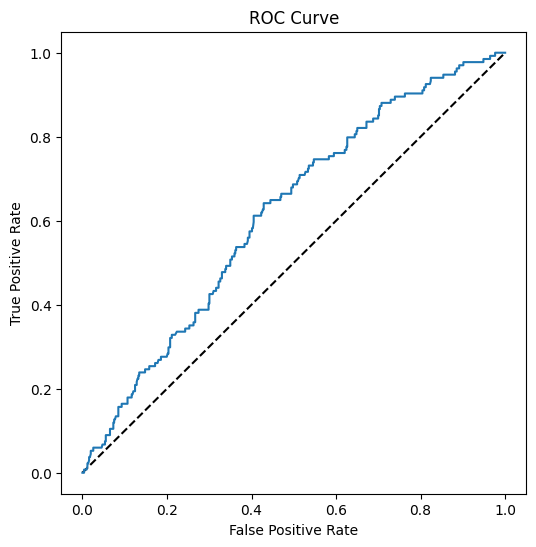

In [22]:
LRprobab = PIPEmodelLR.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, LRprobab[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### DecisionTreeClassifier

In [23]:
## define preprocessing for numeric features(scale them)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
## define preprocessing for categorical features(encode them)
categorical_transformer = Pipeline(steps=[
    ('label', OneHotEncoder(handle_unknown='ignore'))])
## amalgamate preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])
## create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier())])

## fit the pipeline to train a logistic regression model on the training set
PIPEmodelDTC = pipeline.fit(X_train,y_train)
print (PIPEmodelDTC)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'No_Pol']),
                                                 ('cat',
                                                  Pipeline(steps=[('label',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Car_Category',
                                                   'Subject_Car_Colour',
                                                   'Subject_Car_Make',
                                                   'LGA_Name', 'State',
                                                   'ProductName'])])),
                ('classifier', DecisionTreeClassifier())])


In [24]:
# Evaluation Metrics
PIPEpredictionsDTC = PIPEmodelDTC.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,PIPEpredictionsDTC ))
print(classification_report(y_test, PIPEpredictionsDTC))
# Print the confusion matrix
cm = confusion_matrix(y_test, PIPEpredictionsDTC)
print (cm)

Accuracy:  0.6921875
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       506
           1       0.22      0.19      0.20       134

    accuracy                           0.69       640
   macro avg       0.51      0.51      0.51       640
weighted avg       0.67      0.69      0.68       640

[[418  88]
 [109  25]]


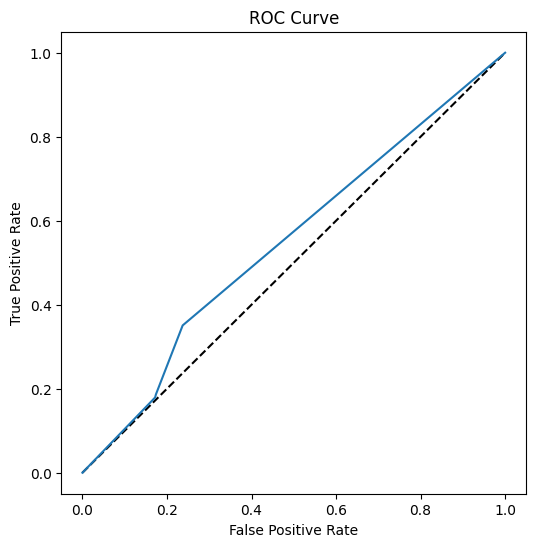

In [25]:
DTCprobab = PIPEmodelDTC.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, DTCprobab[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### KNearestNeighbour

In [26]:
## define preprocessing for numeric features(scale them)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
## define preprocessing for categorical features(encode them)
categorical_transformer = Pipeline(steps=[
    ('label', OneHotEncoder(handle_unknown='ignore'))])
## amalgamate preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])
## create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', KNeighborsClassifier())])

## fit the pipeline to train a logistic regression model on the training set
PIPEmodelKNN = pipeline.fit(X_train,y_train)
print (PIPEmodelKNN)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'No_Pol']),
                                                 ('cat',
                                                  Pipeline(steps=[('label',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Car_Category',
                                                   'Subject_Car_Colour',
                                                   'Subject_Car_Make',
                                                   'LGA_Name', 'State',
                                                   'ProductName'])])),
                ('classifier', KNeighborsClassifier())])


In [27]:
# Evaluation Metrics
PIPEpredictionsKNN = PIPEmodelKNN.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,PIPEpredictionsKNN ))
print(classification_report(y_test, PIPEpredictionsKNN))
# Print the confusion matrix
cm = confusion_matrix(y_test, PIPEpredictionsKNN)
print (cm)

Accuracy:  0.75625
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       506
           1       0.26      0.09      0.13       134

    accuracy                           0.76       640
   macro avg       0.53      0.51      0.50       640
weighted avg       0.68      0.76      0.71       640

[[472  34]
 [122  12]]


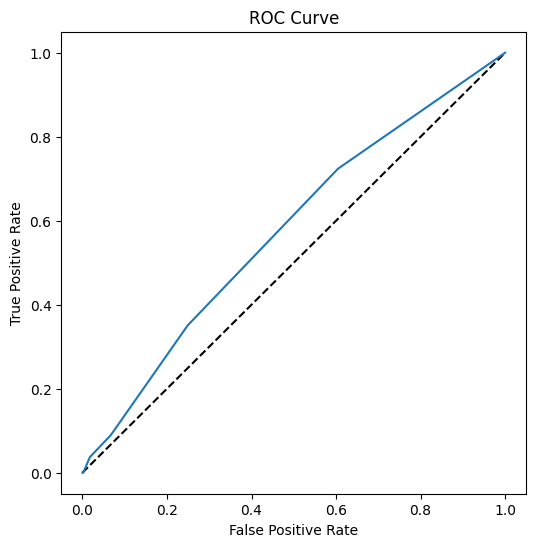

In [28]:
KNNprobab = PIPEmodelKNN.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, KNNprobab[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### SupportVectorMachine

In [33]:
## define preprocessing for numeric features(scale them)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
## define preprocessing for categorical features(encode them)
categorical_transformer = Pipeline(steps=[
    ('label', OneHotEncoder(handle_unknown='ignore'))])
## amalgamate preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])
## create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(probability=True))])

## fit the pipeline to train a logistic regression model on the training set
PIPEmodelSVC = pipeline.fit(X_train,y_train)
print (PIPEmodelSVC)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'No_Pol']),
                                                 ('cat',
                                                  Pipeline(steps=[('label',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Car_Category',
                                                   'Subject_Car_Colour',
                                                   'Subject_Car_Make',
                                                   'LGA_Name', 'State',
                                                   'ProductName'])])),
                ('classifier', SVC(probability=True))])


In [34]:
# Evaluation Metrics
PIPEpredictionsSVC = PIPEmodelSVC.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,PIPEpredictionsSVC ))
print(classification_report(y_test, PIPEpredictionsSVC))
# Print the confusion matrix
cm = confusion_matrix(y_test, PIPEpredictionsSVC)
print (cm)

Accuracy:  0.790625
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       506
           1       0.50      0.01      0.01       134

    accuracy                           0.79       640
   macro avg       0.65      0.50      0.45       640
weighted avg       0.73      0.79      0.70       640

[[505   1]
 [133   1]]


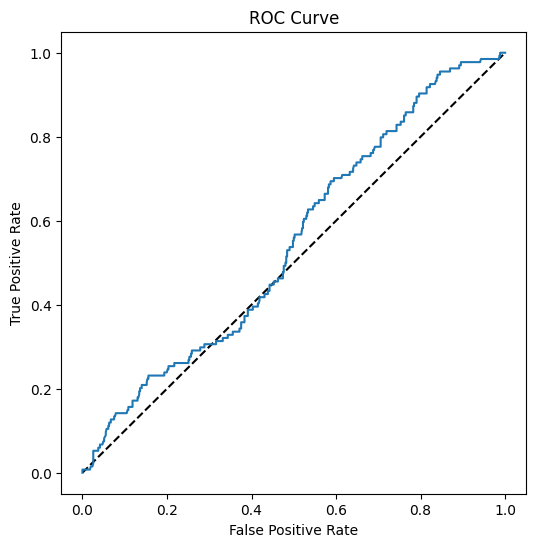

In [35]:
SVCprobab = PIPEmodelSVC.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, SVCprobab[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### GradientBoostingClassifier

In [36]:
## define preprocessing for numeric features(scale them)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
## define preprocessing for categorical features(encode them)
categorical_transformer = Pipeline(steps=[
    ('label', OneHotEncoder(handle_unknown='ignore'))])
## amalgamate preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])
## create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', GradientBoostingClassifier())])

## fit the pipeline to train a logistic regression model on the training set
PIPEmodelGBC = pipeline.fit(X_train,y_train)
print (PIPEmodelGBC)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'No_Pol']),
                                                 ('cat',
                                                  Pipeline(steps=[('label',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Car_Category',
                                                   'Subject_Car_Colour',
                                                   'Subject_Car_Make',
                                                   'LGA_Name', 'State',
                                                   'ProductName'])])),
                ('classifier', GradientBoostingClassifier())])


In [37]:
# Evaluation Metrics
PIPEpredictionsGBC = PIPEmodelGBC.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,PIPEpredictionsGBC ))
print(classification_report(y_test, PIPEpredictionsGBC))
# Print the confusion matrix
cm = confusion_matrix(y_test, PIPEpredictionsGBC)
print (cm)

Accuracy:  0.78125
              precision    recall  f1-score   support

           0       0.79      0.98      0.88       506
           1       0.33      0.04      0.08       134

    accuracy                           0.78       640
   macro avg       0.56      0.51      0.48       640
weighted avg       0.70      0.78      0.71       640

[[494  12]
 [128   6]]


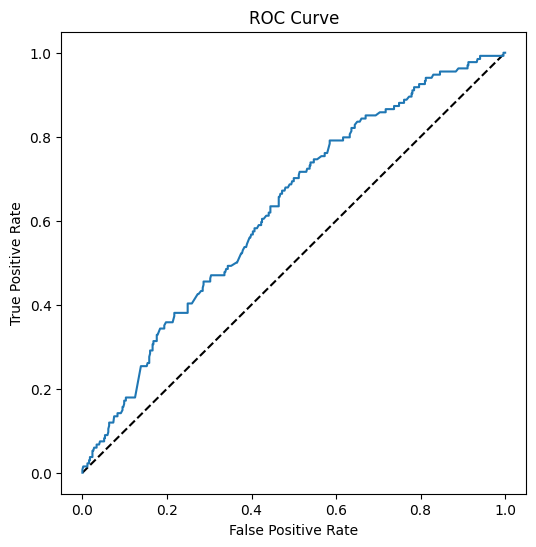

In [38]:
GBCprobab = PIPEmodelGBC.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, GBCprobab[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<h2 align='center'> Feature Engineering </h2>